In [6]:
%%html
<style>
    table.dataframe td, table.dataframe th {
        border: grey solid !important;
        color: white !important;
        }
</style>


In [1]:
import pandas as pd
from ydata_profiling import ProfileReport
import numpy as np
import os
import matplotlib.pyplot as plt
import matplotlib as mpl
import random
import seaborn

os.chdir("/workspace/.devcontainer/")
devcontainer_dir: str = os.getcwd()
dataset_dir: str = devcontainer_dir+"/dataset"


# datasetディレクトリ直下のcsv「ファイル名」を取得
def get_csv(path: str) -> list[str]:
    """CSVファイルだけのファイル名をリストにする関数

    Args:
        path (str): CSVファイルがディレクトリへのパス

    Returns:
        list[str]:CSVファイルだけのファイル名のリスト
    """
    
        
    temp_result: list[str] = os.listdir(path)
    if temp_result == []:
        print("ファイルがありません")
    else:
        csv_files: list = []
        for i in temp_result:
            if i.endswith("csv"):
                csv_files.append(i)
    return csv_files
                
# csvの名前をリスト化
csv_files: list[str] = get_csv(dataset_dir)
# 各csvを読み込み、データフレームオブジェクト化

# タイタニックの本来のデータを、7：3ぐらいで分割し、前者をトレーニング用、後者をテスト用にしている
#testには、Survivedなし。（892番目〜ラストまでのデータ）
test_df = pd.read_csv(dataset_dir+"/"+csv_files[0])
#trainが訓練用（891番目までのデータ）
train_df = pd.read_csv(dataset_dir+"/"+csv_files[1])
# 提出用の例としてのファイル
sub_df = pd.read_csv(dataset_dir+"/"+csv_files[2])





# ステップ1: 読み込んだデータをコピーしたデータフレームオブジェクトを作成しておく

In [23]:
# コピーしたDFをいじっても、元のtrain_dfには影響を与えないので都合がいい
copied_train = train_df.copy()


In [24]:
copied_train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


# ステップ2: データの概観を見る

## pandas.DataFrame.info()

In [25]:
copied_train.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


# ステップ3: データの可視化

## (1) 各ラベルの相関関係

In [26]:
copied_train.loc[:, ["Survived", "Pclass", "Age", "SibSp", "Parch", "Fare"]].corr().style.background_gradient(axis=None)


,Survived,Pclass,Age,SibSp,Parch,Fare
Survived,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
Parch,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
Fare,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000


この結果から、

* PclassとSurvivedは逆相関の関係が少し強そう
* FareとSurvivedは相関関係が少し強そう
* FareとPclassは逆相関の関係が強め

などが見て取れる

## (2) 各列ごとの可視化 

### ヒストグラム

In [27]:
copied_train["Age"]

0      22.0
1      38.0
2      26.0
3      35.0
4      35.0
       ... 
886    27.0
887    19.0
888     NaN
889    26.0
890    32.0
Name: Age, Length: 891, dtype: float64

In [28]:
print(copied_train["Age"].min())
print(copied_train["Age"].max())

0.42
80.0


<Axes: >

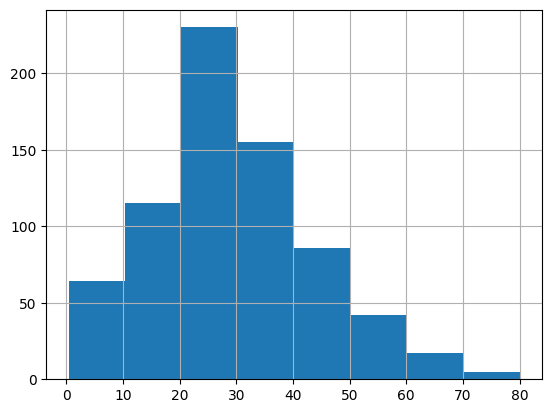

In [29]:
# 上で０〜８０歳までだとわかったので8等分している
copied_train["Age"].hist(bins=8)